## Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import ttest_ind
plt.style.use('seaborn-v0_8')
from scipy.stats import gaussian_kde, normaltest
from sklearn.mixture import GaussianMixture

## Chargement des données

In [3]:
df = pd.read_csv('Apple Stock Prices (1981 to 2023).csv', parse_dates=['Date'], index_col='Date')

## Exploration et premier diagnostic

In [4]:
df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
02/01/1981    0.154018    0.155134    0.154018    0.154018    0.119849   
05/01/1981    0.151228    0.151228    0.150670    0.150670    0.117244   
06/01/1981    0.144531    0.144531    0.143973    0.143973    0.112032   
07/01/1981    0.138393    0.138393    0.137835    0.137835    0.107256   
08/01/1981    0.135603    0.135603    0.135045    0.135045    0.105085   
...                ...         ...         ...         ...         ...   
23/01/2023  138.119995  143.320007  137.899994  141.110001  141.110001   
24/01/2023  140.309998  143.160004  140.300003  142.529999  142.529999   
25/01/2023  140.889999  142.429993  138.809998  141.860001  141.860001   
26/01/2023  143.169998  144.250000  141.899994  143.960007  143.960007   
27/01/2023  143.160004  147.229996  143.080002  145.929993  145.929993   

       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10608 entries, 02/01/1981 to 27/01/2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10608 non-null  float64
 1   High       10608 non-null  float64
 2   Low        10608 non-null  float64
 3   Close      10608 non-null  float64
 4   Adj Close  10608 non-null  float64
 5   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 580.1+ KB


In [6]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.959747   

             Volume  
count  1.060800e+04  
mean   3.275098e+08  
std    3.378203e+08  
min    0.000000e+00  
25%    1.213044e+08  
50%    2.145976e+08  
75%    4.066804e+08  
max    7.421641e+09  


## Valeurs manquantes et doublons

In [7]:
print(df.isna().sum())
print("Doublons :", df.duplicated().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Doublons : 0


Il n'y a pas de valeurs manquantes

## Corrélation entre variables

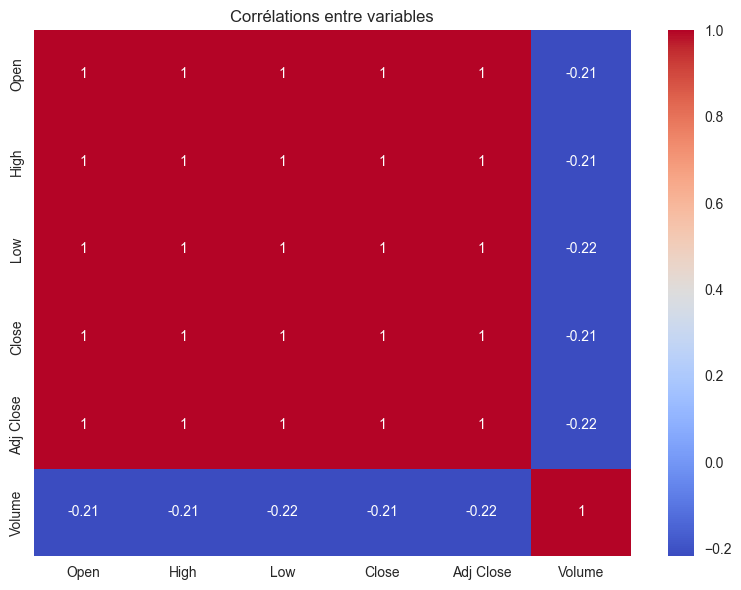

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables")
plt.tight_layout()
plt.show()

NameError: name 'ScalarFormatter' is not defined

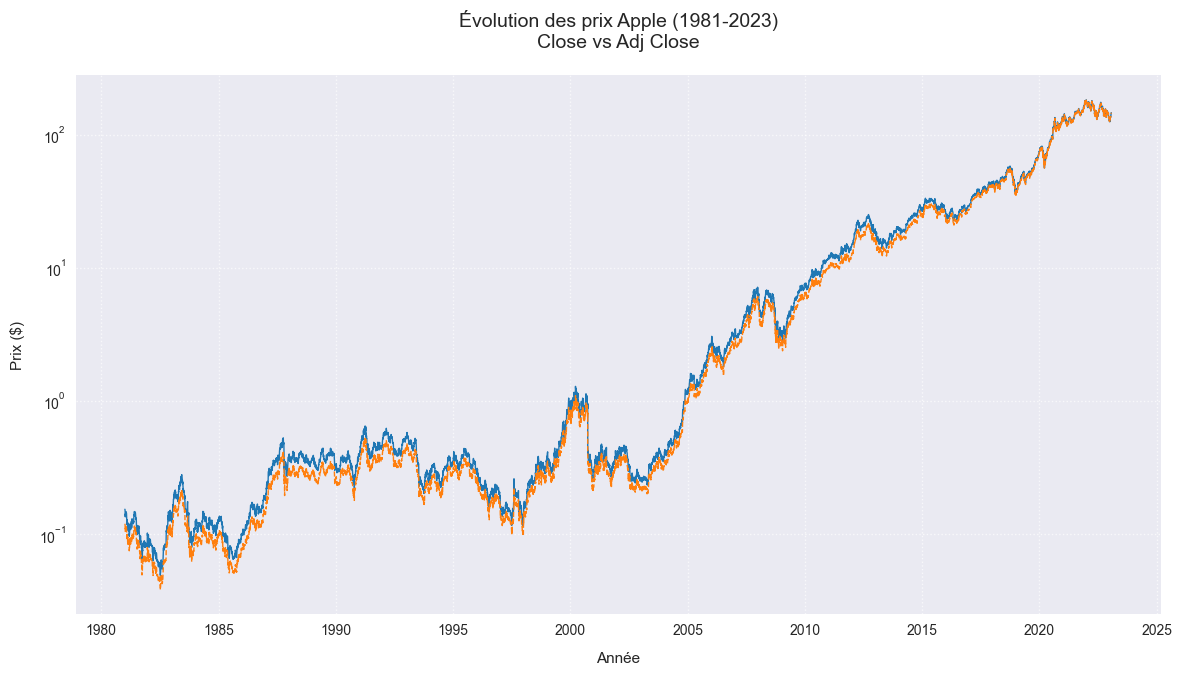

In [9]:
# Configuration du graphique
plt.figure(figsize=(14, 7))

# Conversion explicite de l'index avec le bon format de date
df.index = pd.to_datetime(df.index, dayfirst=True)  # <-- Correction clé ici

# Tracé des courbes
plt.plot(df.index, df['Close'], label='Close (Prix Brut)', color='#1f77b4', linewidth=1)
plt.plot(df.index, df['Adj Close'], label='Adj Close (Prix Ajusté)', color='#ff7f0e', linestyle='--', linewidth=1)

# Personnalisation
plt.title('Évolution des prix Apple (1981-2023)\nClose vs Adj Close', pad=20, fontsize=14)
plt.xlabel('Année', labelpad=10)
plt.ylabel('Prix ($)', labelpad=10)
plt.grid(True, linestyle=':', alpha=0.7)

# Formatage de l'axe des dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Gestion de l'échelle logarithmique
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.yticks([0.1, 1, 10, 100], ['0.1$', '1$', '10$', '100$'])

# Ajout des splits (version optimisée)
splits = {
    '16/06/1987': 'Split 2:1',  # Format jour/mois/année
    '21/06/2000': 'Split 2:1',
    '28/02/2005': 'Split 2:1',
    '09/06/2014': 'Split 7:1',
    '31/08/2020': 'Split 4:1'
}

for date_str, label in splits.items():
    date = pd.to_datetime(date_str, dayfirst=True)
    if date in df.index:
        plt.axvline(date, color='gray', linestyle=':', alpha=0.5, linewidth=0.8)
        plt.text(date, ax.get_ylim()[1]*0.9, label, 
                rotation=90, va='top', ha='right', fontsize=8)

# Légende
plt.legend(framealpha=0.9, loc='upper left')

# Ajustements finaux
plt.tight_layout()
plt.show()

##  Étape 2 : Nettoyage et Préparation des Données

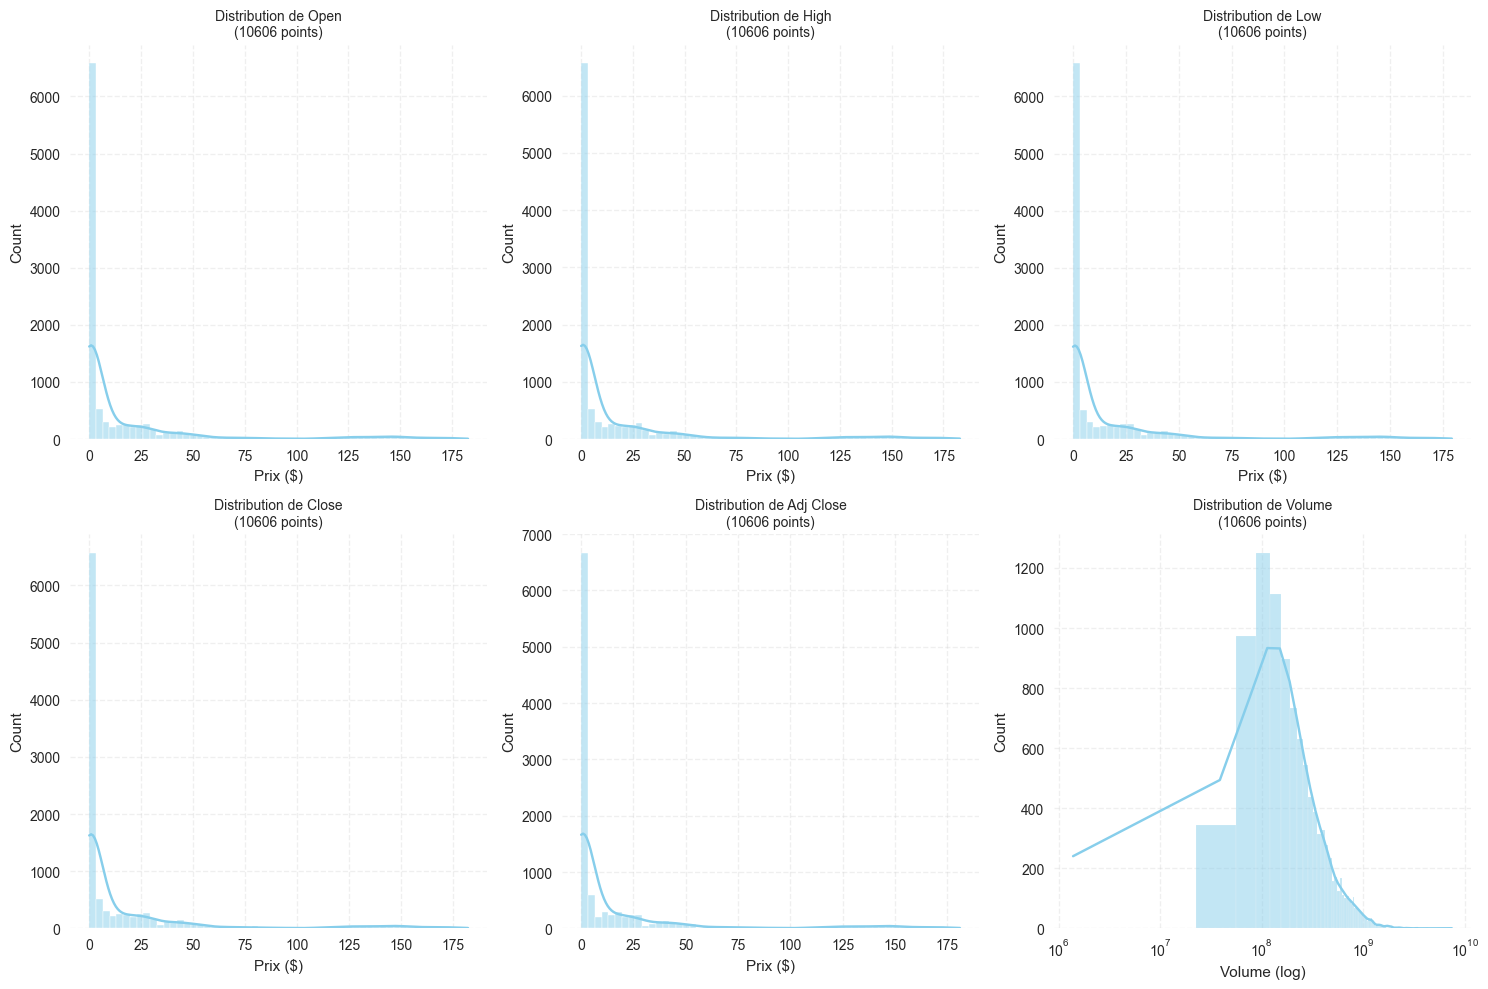


Statistiques des rendements:
count   10605.00000
mean        0.10541
std         2.82372
min       -51.86920
25%        -1.31065
50%         0.00000
75%         1.46860
max        33.22804


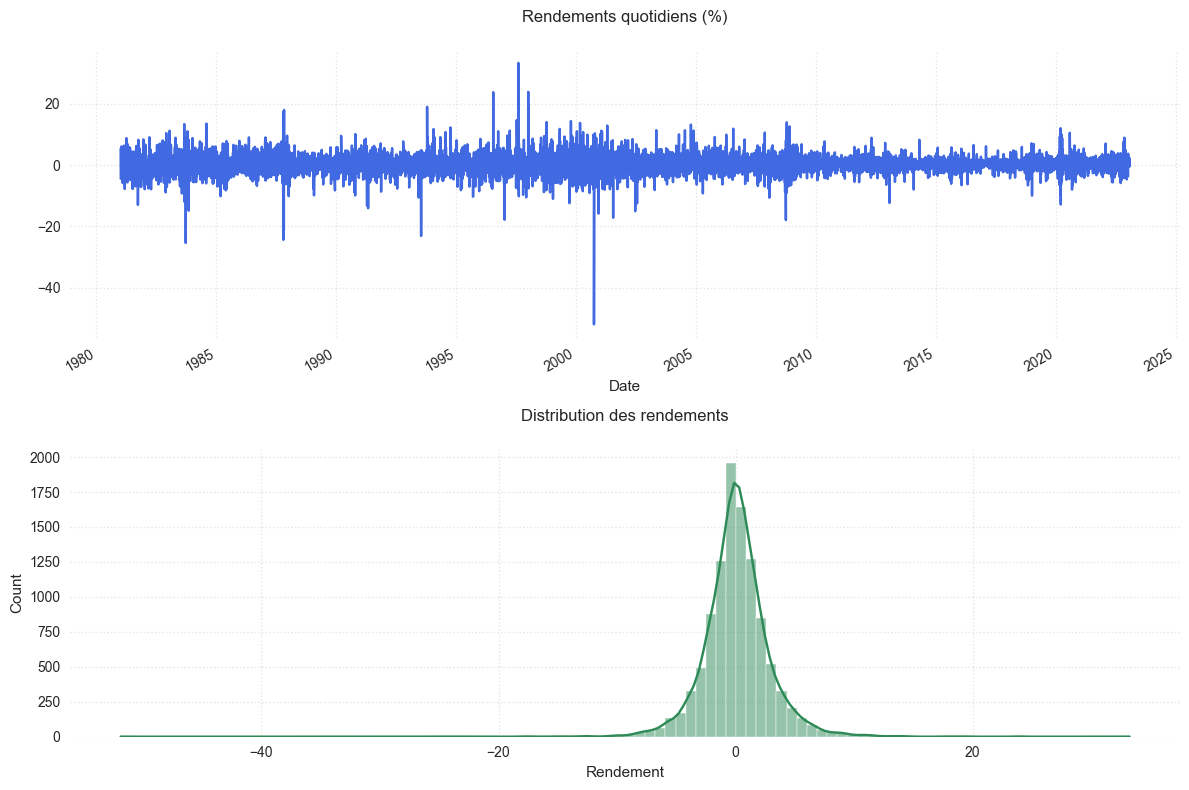

In [ ]:
# Configuration de l'affichage
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set_style("whitegrid")  # Style moderne équivalent à seaborn


# 2. Nettoyage des données
def nettoyer_donnees(df):
    """Filtre les valeurs aberrantes et prépare les données"""
    # Seuils minimaux réalistes
    seuils = {
        'Open': 0.01, 'High': 0.01, 'Low': 0.01, 
        'Close': 0.01, 'Adj Close': 0.01, 'Volume': 1
    }
    
    # Application des seuils
    for col, seuil in seuils.items():
        if col in df.columns:
            df = df[df[col] >= seuil]
    
    return df.dropna()

df_clean = nettoyer_donnees(df.copy())

# 3. Visualisation des distributions
def plot_distributions(df):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']):
        plt.subplot(2, 3, i + 1)
        
        # Paramètres adaptatifs
        data = df[col]
        n_bins = min(50, int(len(data)**0.5))
        range_ = (data.quantile(0.01), data.quantile(0.99))
        
        sns.histplot(data, kde=True, bins=n_bins, binrange=range_, color='skyblue')
        
        if col == 'Volume':
            plt.xscale('log')
            plt.xlabel('Volume (log)')
        else:
            plt.xlabel('Prix ($)')
            
        plt.title(f'Distribution de {col}\n({len(data)} points)', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_distributions(df_clean)

# 4. Calcul et analyse des rendements
def analyser_rendements(df):
    """Calcule et visualise les rendements quotidiens"""
    df['Rendement'] = df['Close'].pct_change() * 100  # En pourcentage
    
    # Statistiques de base
    print("\nStatistiques des rendements:")
    print(df['Rendement'].describe().to_string())
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    
    # Rendements bruts
    plt.subplot(2, 1, 1)
    df['Rendement'].plot(color='royalblue')
    plt.title('Rendements quotidiens (%)', pad=20)
    plt.grid(True, linestyle=':', alpha=0.5)
    
    # Distribution des rendements
    plt.subplot(2, 1, 2)
    sns.histplot(df['Rendement'].dropna(), bins=100, kde=True, color='seagreen')
    plt.title('Distribution des rendements', pad=20)
    plt.grid(True, linestyle=':', alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('analyse_rendements.png', dpi=300, bbox_inches='tight')
    plt.show()

analyser_rendements(df_clean)

### Boxplots

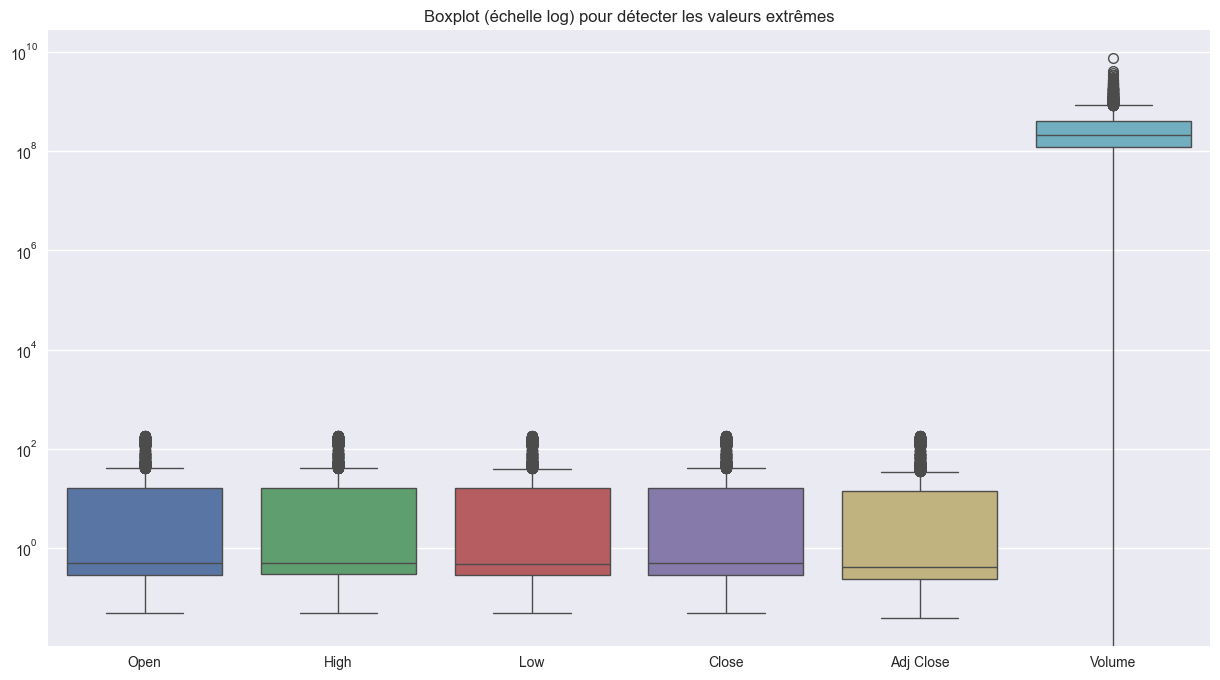

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.yscale('log')
plt.title('Boxplot (échelle log) pour détecter les valeurs extrêmes')
plt.show()

### Histogrammes avec transformation log

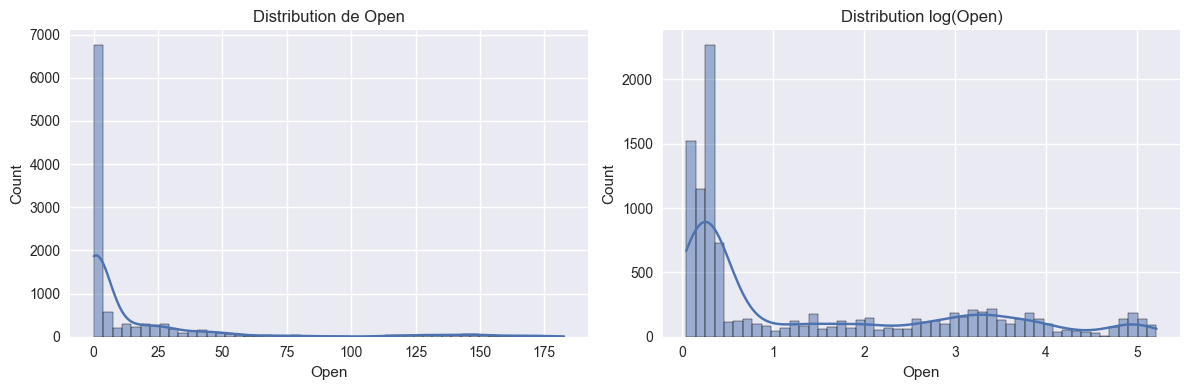

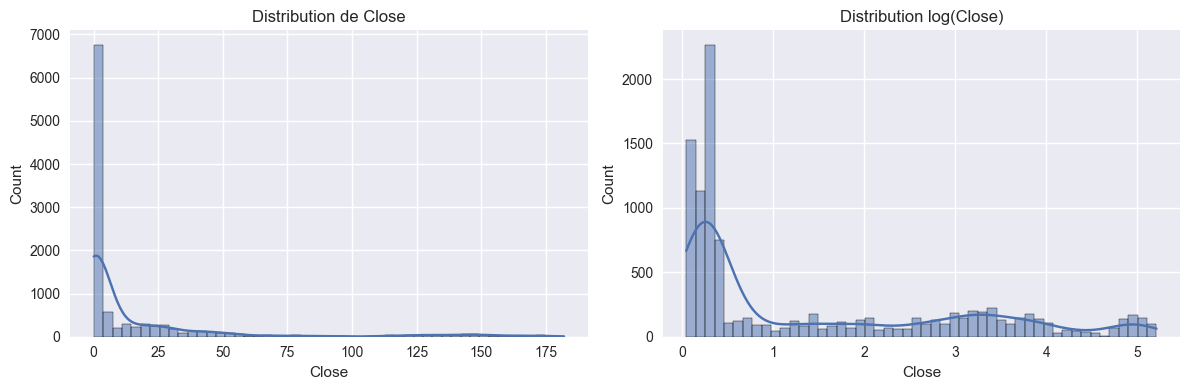

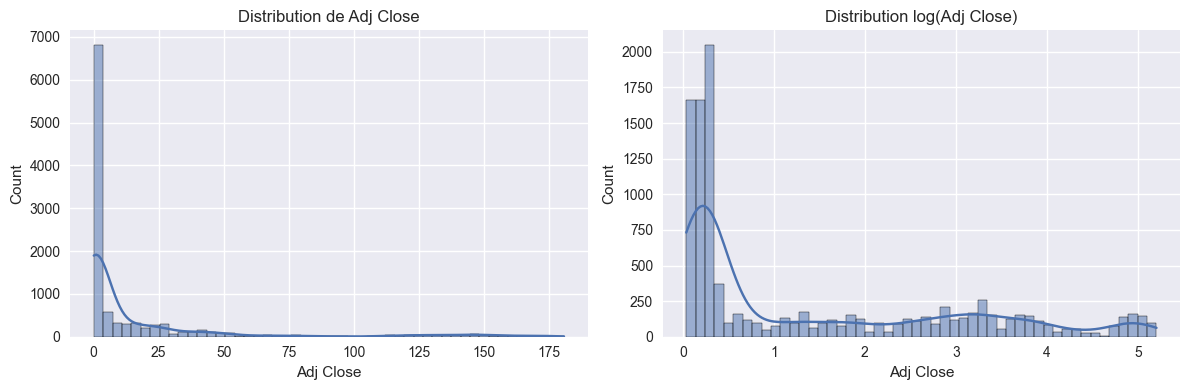

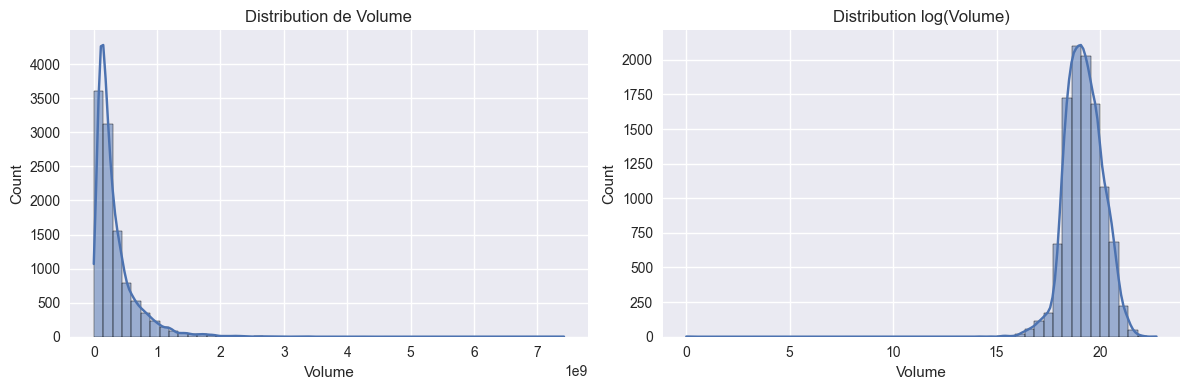

In [ ]:
cols = ['Open', 'Close', 'Adj Close', 'Volume']
for col in cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution de {col}")

    plt.subplot(1,2,2)
    sns.histplot(np.log1p(df[col]), bins=50, kde=True)
    plt.title(f"Distribution log({col})")
    plt.tight_layout()
    plt.show()

### Création de colonnes transformées et détection d'outliers

In [ ]:
df['Log_Volume'] = np.log1p(df['Volume'])
df['Log_Close'] = np.log1p(df['Close'])

Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Volume'] < (Q1 - 1.5 * IQR)) | (df['Volume'] > (Q3 + 1.5 * IQR))]
print(f"Nombre d'outliers Volume : {len(outliers)}")

Nombre d'outliers Volume : 783


## Étape 3 : Investigation d'un Comportement Complexe


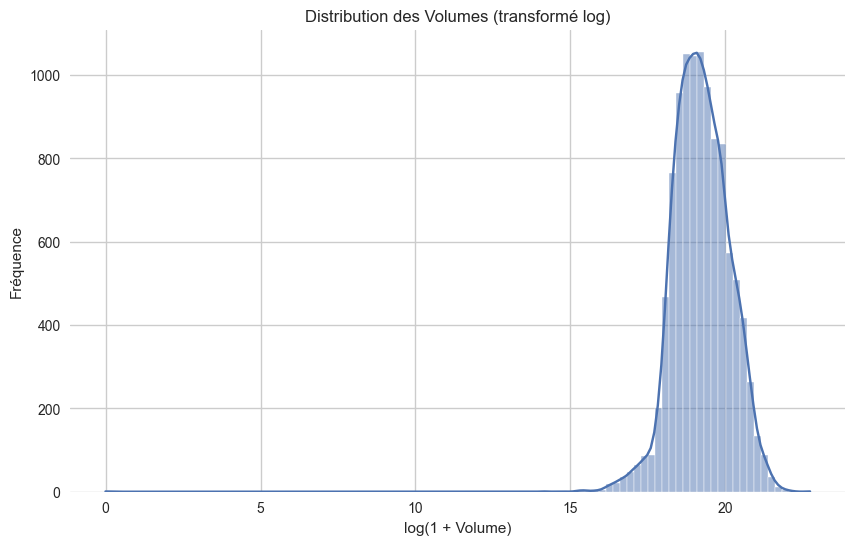

In [ ]:
def plot_log_volume(df):
    try:
        if 'Log_Volume' not in df.columns:
            if 'Volume' in df.columns:
                df['Log_Volume'] = np.log1p(df['Volume'])
            else:
                raise KeyError("Ni 'Log_Volume' ni 'Volume' trouvés")
                
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Log_Volume'], bins=100, kde=True)
        plt.title("Distribution des Volumes (transformé log)")
        plt.xlabel("log(1 + Volume)")
        plt.ylabel("Fréquence")
        plt.show()
        
    except Exception as e:
        print(f"Erreur : {str(e)}")
        print("Colonnes disponibles :", df.columns.tolist())

plot_log_volume(df)

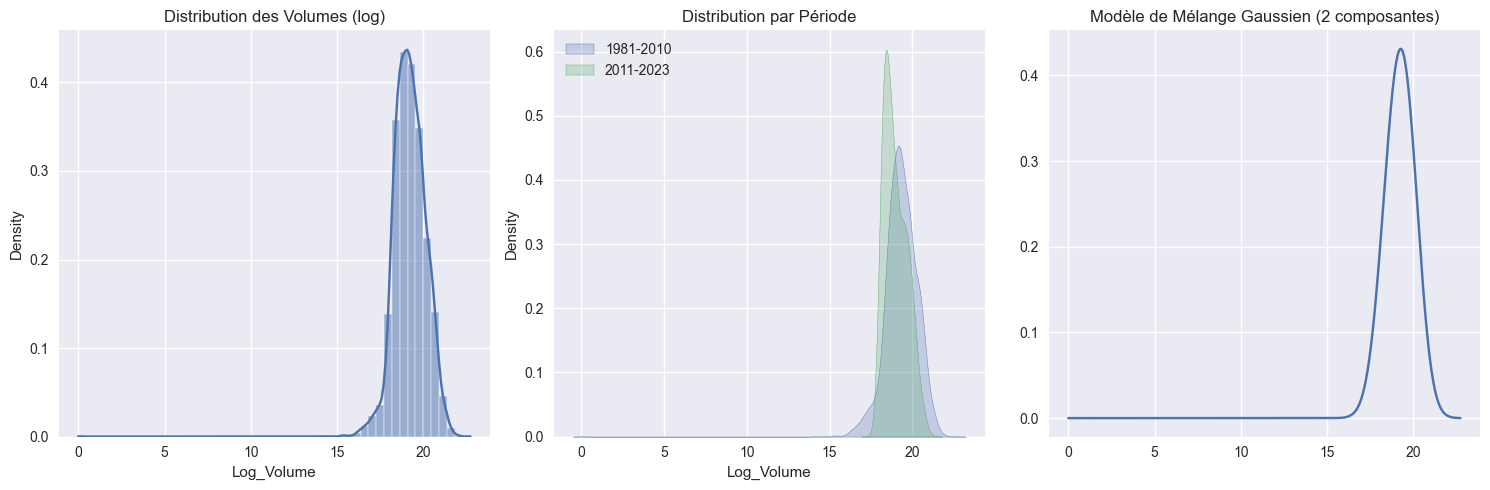


=== Tests Statistiques ===
Test de normalité (p-value): 0.0000
Test t entre périodes (p-value): 0.0000
Scores BIC (1-3 composantes): [np.float64(28076.856481006325), np.float64(28204.152980633775), np.float64(27725.870742112333)]


In [ ]:
def analyse_bimodalite(df, col='Volume'):
    """Analyse complète de la bimodalité"""
    # 1. Préparation des données
    df['Log_Volume'] = np.log1p(df[col])
    data = df['Log_Volume'].dropna()
    
    # 2. Visualisation avancée
    plt.figure(figsize=(15, 5))
    
    # Histogramme avec courbe KDE
    plt.subplot(1, 3, 1)
    sns.histplot(data, bins=50, kde=True, stat='density')
    plt.title('Distribution des Volumes (log)')
    
    # Graphique de densité par période
    plt.subplot(1, 3, 2)
    pre_2010 = df.loc[:'2010', 'Log_Volume'].dropna()
    post_2010 = df.loc['2011':, 'Log_Volume'].dropna()
    sns.kdeplot(pre_2010, label='1981-2010', fill=True)
    sns.kdeplot(post_2010, label='2011-2023', fill=True)
    plt.title('Distribution par Période')
    plt.legend()
    
    # Test de mélange gaussien
    plt.subplot(1, 3, 3)
    X = data.values.reshape(-1, 1)
    gmm = GaussianMixture(n_components=2).fit(X)
    x = np.linspace(data.min(), data.max(), 1000)
    plt.plot(x, np.exp(gmm.score_samples(x.reshape(-1, 1))))
    plt.title('Modèle de Mélange Gaussien (2 composantes)')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Tests statistiques
    print("\n=== Tests Statistiques ===")
    # Test de normalité (si p < 0.05 → non normal)
    print(f"Test de normalité (p-value): {normaltest(data)[1]:.4f}")
    
    # Différence entre périodes
    if len(pre_2010) > 30 and len(post_2010) > 30:
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(pre_2010, post_2010)
        print(f"Test t entre périodes (p-value): {p_val:.4f}")
    
    # Score BIC (comparaison modèles)
    bic = []
    for n in range(1, 4):
        gmm = GaussianMixture(n_components=n).fit(X)
        bic.append(gmm.bic(X))
    print(f"Scores BIC (1-3 composantes): {bic}")

# Application
analyse_bimodalite(df)

### Test statistique : comparaison avant/après 2010

In [ ]:
before_2010 = df[df.index < '2010']
after_2010 = df[df.index >= '2010']
stat, pval = ttest_ind(before_2010['Adj Close'], after_2010['Adj Close'], equal_var=False)
print(f"T-test Adj Close avant/après 2010 : p-value = {pval:.4f}")

T-test Adj Close avant/après 2010 : p-value = 0.8405


## Étape 4 : Construction du Jeu de Données

In [ ]:
df['Return'] = df['Adj Close'].pct_change()
df['LogReturn'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df['SMA_30'] = df['Adj Close'].rolling(30).mean()
df['Volatility'] = df['Adj Close'].rolling(30).std()

### Jeu de données final

In [ ]:
df_final = df[['Adj Close', 'LogReturn', 'SMA_30', 'Volatility', 'Log_Volume']].dropna()
print(df_final.head())

            Adj Close  LogReturn    SMA_30  Volatility  Log_Volume
Date                                                              
12/02/1981   0.090755  -0.009530  0.105606    0.008094   16.493789
13/02/1981   0.088584  -0.024212  0.104564    0.008208   16.227416
17/02/1981   0.090755   0.024212  0.103681    0.008222   16.323092
18/02/1981   0.094663   0.042160  0.103102    0.008225   16.772585
19/02/1981   0.089018  -0.061485  0.102494    0.008574   16.920564


## Étape 5 : Analyse Approfondie
### Évolution dans le temps

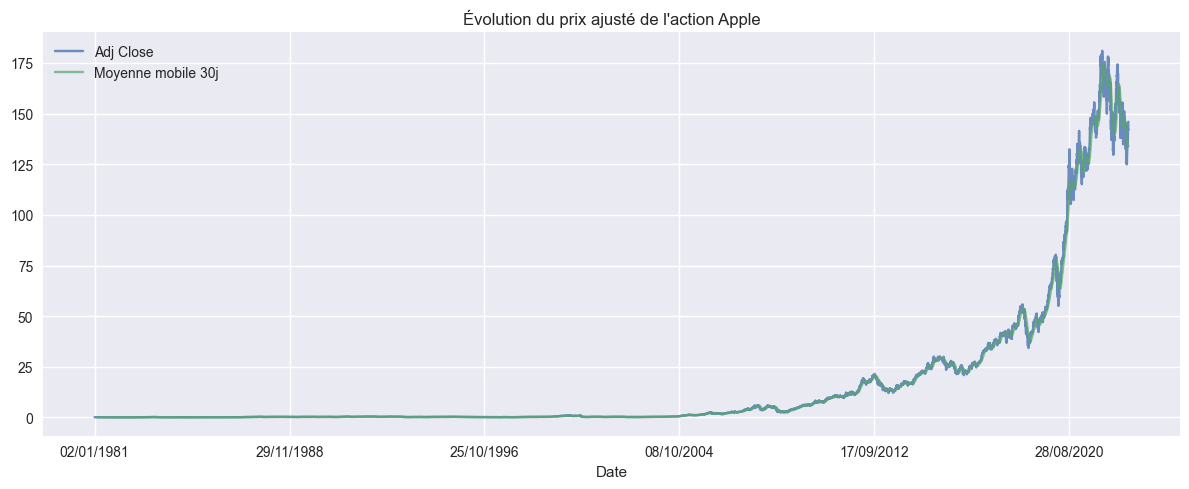

In [ ]:
plt.figure(figsize=(12,5))
df['Adj Close'].plot(label='Adj Close', alpha=0.8)
df['SMA_30'].plot(label='Moyenne mobile 30j', alpha=0.7)
plt.title("Évolution du prix ajusté de l'action Apple")
plt.legend()
plt.tight_layout()
plt.show()

### Relation volume vs log return

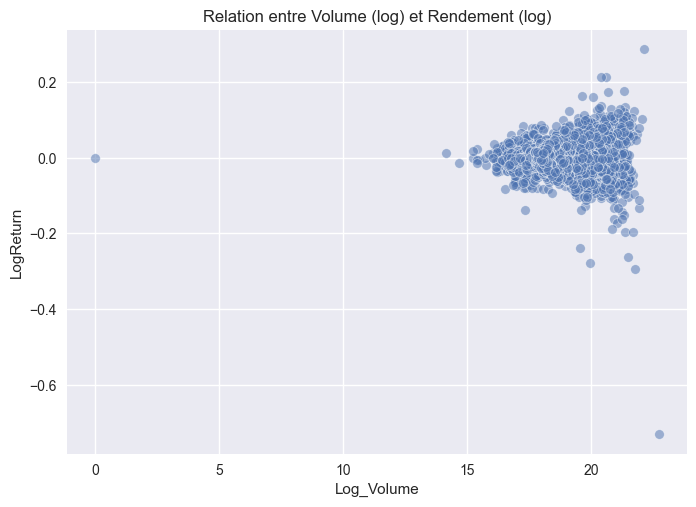

In [ ]:
sns.scatterplot(data=df_final, x='Log_Volume', y='LogReturn', alpha=0.5)
plt.title("Relation entre Volume (log) et Rendement (log)")
plt.show()

## Analyse  par année et par mois

C:\Users\Zbook\AppData\Local\Temp\ipykernel_15968\2480328373.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = df['Adj Close'].resample('Y').mean()


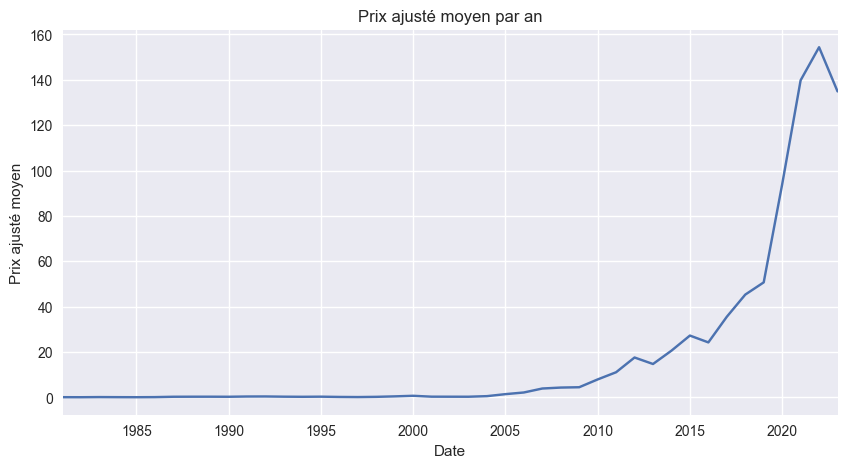

In [ ]:
annual = df['Adj Close'].resample('Y').mean()
annual.plot(title="Prix ajusté moyen par an", figsize=(10,5))
plt.ylabel("Prix ajusté moyen")
plt.show()

### Variation mensuelle moyenne

C:\Users\Zbook\AppData\Local\Temp\ipykernel_15968\1216691731.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Adj Close'].resample('M').mean()


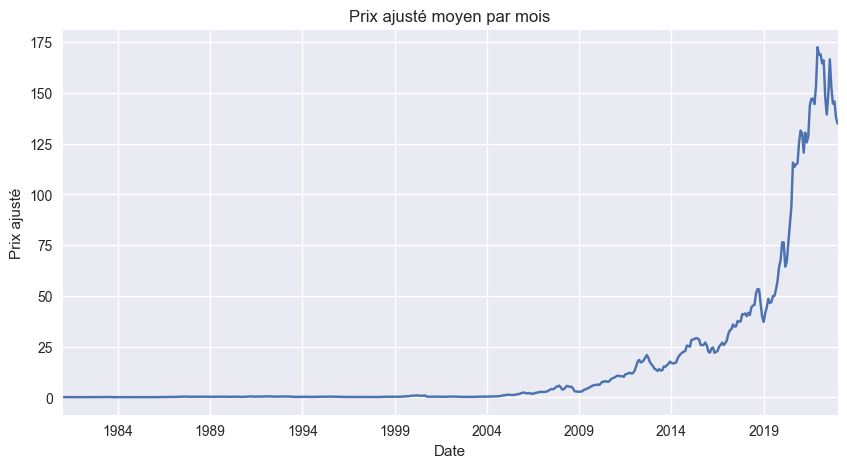

In [ ]:
monthly = df['Adj Close'].resample('M').mean()
monthly.plot(title="Prix ajusté moyen par mois", figsize=(10,5))
plt.ylabel("Prix ajusté")
plt.show()

## Analyse d'événements clés
### Crise financière 2008

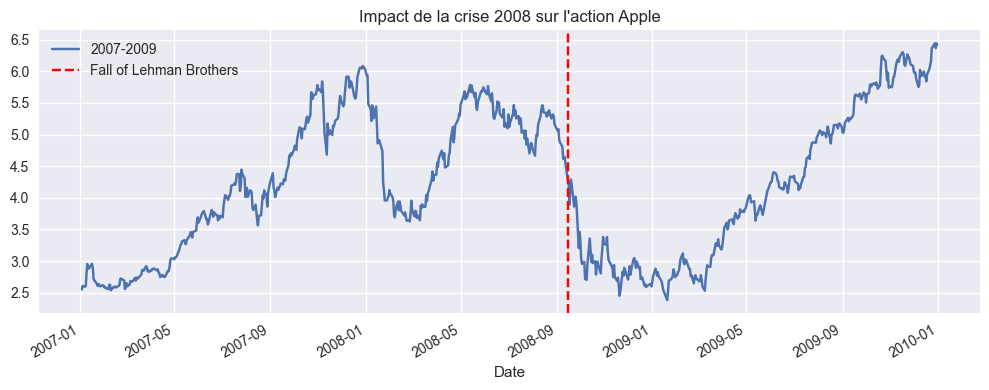

In [ ]:
df_2008 = df['2007-01':'2009-12']
plt.figure(figsize=(10,4))
df_2008['Adj Close'].plot(label='2007-2009')
plt.axvline(pd.Timestamp('2008-09-15'), color='red', linestyle='--', label='Fall of Lehman Brothers')
plt.title("Impact de la crise 2008 sur l'action Apple")
plt.legend()
plt.tight_layout()
plt.show()

### Sortie de produits majeurs (iPhone 1, iPhone 4, iPhone X)

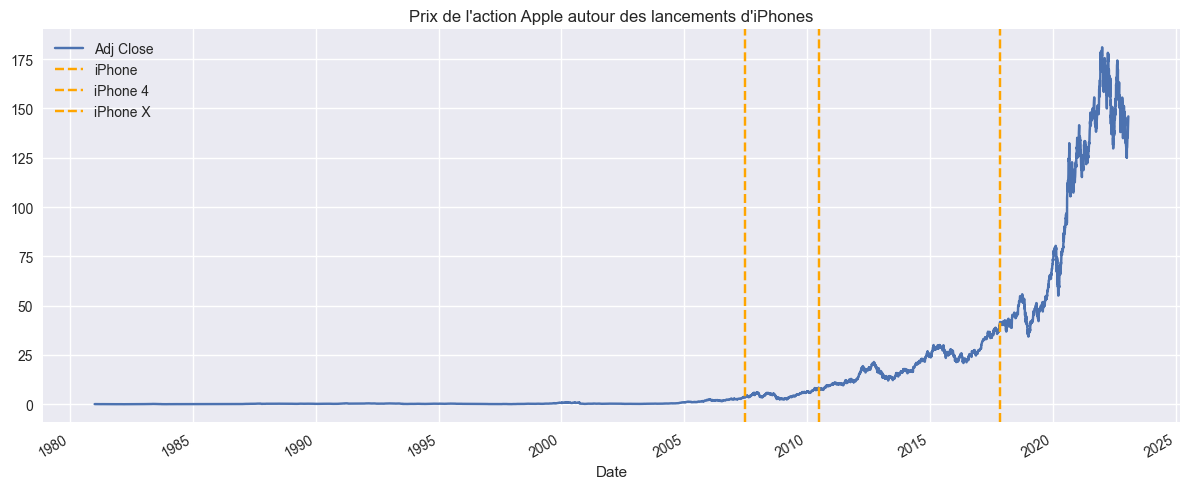

In [ ]:
dates = ['2007-06-29', '2010-06-24', '2017-11-03']
labels = ['iPhone', 'iPhone 4', 'iPhone X']

plt.figure(figsize=(12,5))
df['Adj Close'].plot(label='Adj Close')
for d, l in zip(dates, labels):
    plt.axvline(pd.to_datetime(d), color='orange', linestyle='--', label=l)
plt.title("Prix de l'action Apple autour des lancements d'iPhones")
plt.legend()
plt.tight_layout()
plt.show()

##  Conclusion

Données 
- Les données ont été nettoyées, transformées et enrichies.
- Une bimodalité du volume a été détectée.


Analyse financière en prenant en compte les paramaètres macro économique, des splits et des lancements produits

    Croissance exponentielle : L'action Apple montre une croissance impressionnante dans le temps surtout après 2005

    Impact des splits : Visible comme des "chutes" brutales dans le prix qui ne se voient pas en prenant la valeur après ajustement (close adj)

    Comportement des volumes : Distribution bimodale suggérant un changement de régime de trading

     La crise 2008 et le lancement de chaque nouvelle génération d'iPhone ont visiblement impacté le cours : en négatif pour la crise de 2008 et positif pour les lancements majeurs